In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies_df = pd.read_csv('../data/movies.csv')
train_df = pd.read_csv('../data/train.csv', compression='gzip')
test_df = pd.read_csv('../data/test.csv', compression='gzip')

In [3]:
train_users = set(train_df['userId'])
test_users = set(test_df['userId'])

print(f'train user: {len(train_users):,}')
print(f'test user: {len(test_users):,}')
print(f'new user: {len(test_users - train_users):,}')

train user: 137,883
test user: 91,470
new user: 24,658


In [4]:
train_items = set(train_df['movieId'])
test_items = set(test_df['movieId'])

print(f'train item: {len(train_items):,}')
print(f'test item: {len(test_items):,}')
print(f'new item: {len(test_items - train_items):,}')

train item: 34,461
test item: 58,346
new item: 24,586


In [5]:
train_df['dt'] = pd.to_datetime(train_df['timestamp'], unit='s')
min_dt = train_df['dt'].min()
max_dt = train_df['dt'].max()
print(f'train datetime range: {min_dt} - {max_dt}')

train datetime range: 1995-01-09 11:46:49 - 2016-06-25 06:49:57


In [6]:
train_df['year'] = train_df['dt'].dt.year

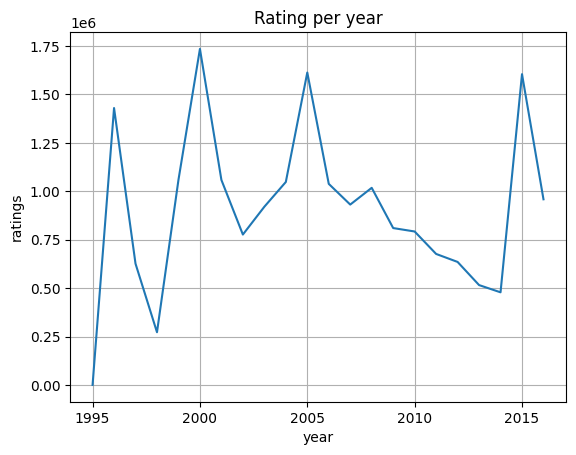

In [7]:
train_df.groupby('year').size().plot(ylabel='ratings', title='Rating per year', grid=True)
plt.show()

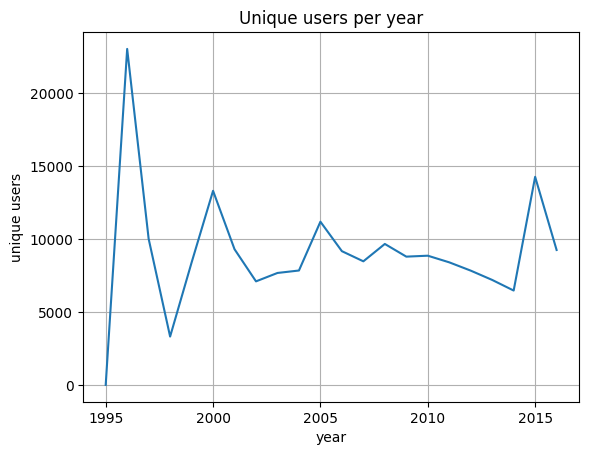

In [8]:
train_df.groupby('year')['userId'].nunique().plot(ylabel='unique users', title='Unique users per year', grid=True)
plt.show()

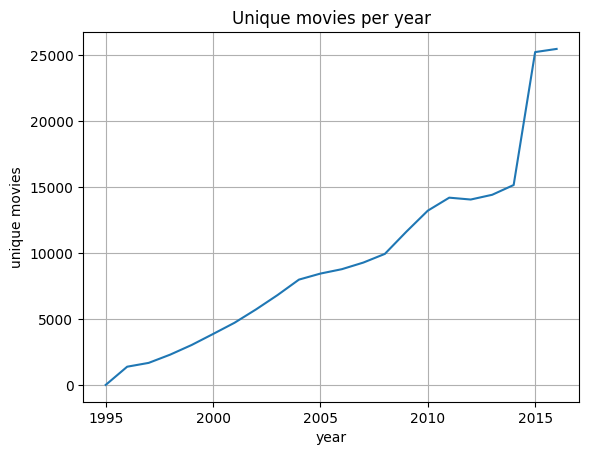

In [9]:
train_df.groupby('year')['movieId'].nunique().plot(ylabel='unique movies', title='Unique movies per year', grid=True)
plt.show()

In [10]:
test_only_movies = test_items - train_items
movies_df['test_only'] = movies_df['movieId'].isin(test_only_movies)

movies_df['year'] = movies_df['title'].str.rsplit('(', n=1).str[1].str.strip(')').str.strip(') ')
movies_df['year'] = pd.to_numeric(movies_df['year'], errors='coerce').astype('UInt64')

In [11]:
movies_df['year'].max()

2019

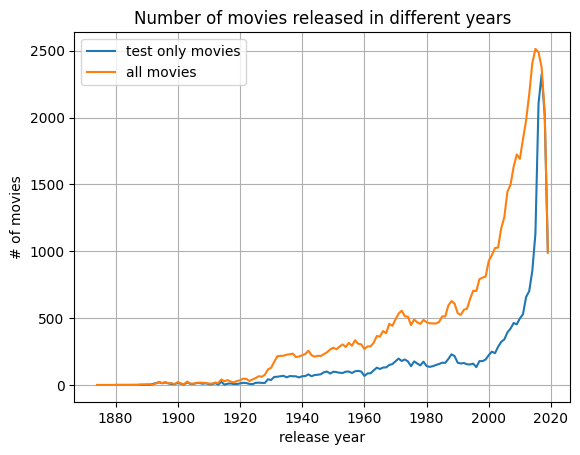

In [12]:
test_only_movies = movies_df.query('test_only').groupby('year').size().sort_index()
all_movies = movies_df.groupby('year').size().sort_index()

plt.plot(test_only_movies.index, test_only_movies.values, label='test only movies')
plt.plot(all_movies.index, all_movies.values, label='all movies')

plt.title('Number of movies released in different years')
plt.ylabel('# of movies')
plt.xlabel('release year')
plt.legend()
plt.grid()
plt.show()

In [13]:
all_movies.tail(10)

year
2010    1691
2011    1838
2012    1978
2013    2173
2014    2406
2015    2513
2016    2488
2017    2374
2018    2034
2019     994
dtype: int64

In [14]:
test_only_movies.tail(10)

year
2010     498
2011     530
2012     658
2013     702
2014     854
2015    1132
2016    2105
2017    2324
2018    2013
2019     991
dtype: int64

In [57]:
EDGE_YEARS = [
    1995, 1996, 1998, 1999, 2001, 2003, 2005, 2007, 2010, 2013, 2016
]

def encode_year(year: pd.Series):
    if pd.isna(year):
        return 0

    for i, edge in enumerate(EDGE_YEARS):
        if year <= edge:
            return i + 1

    return len(EDGE_YEARS) + 1


In [51]:
import numpy as np

In [76]:
movies_df['year'].values

array([False, False, False, ..., False, False, False])

In [56]:
df['encoded_year'] = df['year'].apply(lambda x: encode_year(x, edge_years))
print(df)

     year  encoded_year
0  1994.0             1
1  1995.5             2
2  1997.0             3
3  2000.0             5
4  2015.0            11
5  2017.0            12
6     NaN             0


In [49]:
movies_df['year']

,year,encoded_year
0,1994.0,1
1,1995.5,2
2,1997.0,3
3,2000.0,5
4,2015.0,11
5,2017.0,11
6,NaN,0


## Observations

Presumably, the dataset was divided on train / test splits by time:
- train: (the 9th of January, 1995 – the 25th of June 2016)
- test: (June 2016 – 2019)

So, test size is approximately 3 years.

One can see, that there are old movies (released before 2016) in the test set. Probably, the inventory of the movie service was extended with old movies after June 2016.